<h1 style="text-align:center;">Resolução numérica de Equações Diferenciais Não Homogêneas</h1>

<h2>Introdução</h2>

<p style="text-align: justify; text-indent:4em">Diversos fenômenos da ciência, engenharia, economia e da natureza (de modo geral), podem ser descritos/modelados por equações diferenciais. "Em síntese, uma 
equação  diferencial é uma equação que envolve uma função desconhecida (incógnita) e suas derivadas"[1]. Em muitos casos, a resolução analítica das equações é extremamente custosa ou inviável. Assim, os métodos numéricos fornecem aproximações para a solução dessas equações diferenciais.</p>
<p style="text-align: justify; text-indent:4em">Uma Equação Diferencial Ordinária (EDO) é a ED cuja a função incógnita desconhecida  depende  de  uma  única  variável independente. Dessa maneira, apenas derivadas ordinárias são encontradas nessas equações[2]. Uma EDO pode ser classificada em relação a sua ordem. Por exemplo, se uma EDO tiver como derivada de maior grau uma derivado segunda, ela é dita como uma EDO de ordem 2. Essas equações possuem uma solução geral e também soluções particulares, que dependem das "condições iniciais". Para uma EDO de primeira ordem, apenas uma condição inicial é necessária. Analogamente, uma EDO de terceira ordem requer três condições iniciais para que uma solução particular possa ser encontrada. A imagem abaixo mostra como uma mesmo EDO pode possuir várias soluções particulares que dependem justamente das condições iniciais.</p>
<center><img src="img/edo.png"></center>
<center style="margin-top:6px; font-size:12px; font-weight:bold; margin-top:-20px">Soluções particulares de uma ODE</center>

<h2>Métodos Numéricos</h2>
<p style="text-align: justify; text-indent:4em">Os métodos desenvolvidos nesse trabalho se baseiam na Série de Taylor. Em linhas gerais, é uma série que exprime uma função analítica f em termos de um somatório de potências, de modo que as primeiros valores da série possuem uma contribuição maior, ou seja, medida que o somatório contínua, os novos termos passam a contribuir menos na aproximação da série em um dado ponto. A equação abaixo representa a série de Taylor em torno do ponto <i>a</i>.</p>

\begin{align*}
f(x) = \sum_{i=0}^N \frac {f^{(n)}(a)}{n!}\ (x-a)^{n}\ 
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">Série de Taylor</center>
<h3>Método de Euler</h3>

<p style="text-align: justify; text-indent:4em">O método de Euler é descrito pela equação abaixo. Ele é conhecido como método da tangente e pode ser obtido como parte do polinômio de Taylor de
ordem 1. Ele é o método explícito mais básico de resolução de EDO's, tendo sido desenvolvido por Leonhard Euler. Como pode-se ver pela equação abaixo, esse método depende apenas de um valor precedente, por isso ele é classificado como um método de passo simples. </p>
<br>
\begin{align*} 
    y_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">Método de Euler</center>

<p style="text-align: justify; text-indent:4em"> Por ser bastante simples, ele é interessante para aproximações iniciais, porém ele não é eficiente, pois para conseguir aproximações "boas", o intervalo entre os valores do domínio deve ser "muito" pequeno, o que gera um maior esforço computacional. A célula abaixo contém a implementação desse método. Percebe-se que ela possui duas funções, uma que "monta" as listas com os valores da aproximação e a outra que retorna a predição - a ser somada com a imagem do elemento anterior do domínio - de acordo com a edo, o valor precedente do domínio e da imagem e o intervalo h entre os valores do domínio.  

In [1]:
# Euler = Range-Kutta de primeira ordem
def predicao_euler(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    return h*f(x, y)


def calcular_por_euler(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do metodo 
    de euler 
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        imagem[i+1] = imagem[i] + predicao_euler(f, dominio[i], imagem[i], h)
        aux += h
        dominio[i+1] = aux 
    
    return dominio, imagem 

SyntaxError: invalid syntax (<ipython-input-1-68f5e4e90977>, line 2)

<h3>Métodos de Runge-Kutta</h3>
<p style="text-align: justify; text-indent:4em"> Os métodos de Runge-Kutta foram desenvolvidos por volta de 1900 por dois matemáticos Alemães, C. Runge e M. W. Kutta. Eles são classificados como métodos de passo simples, porém implicitos iterativos. Nesse trabalho, foram implementandos os métodos de Runge-Kutta (RK) de segunda (RK2), terceira (RK3) e quarta ordem (RK4). O RK2 também é conhecido como Método de Euler Melhorado. Normalmente, quando se fala apenas método de Runge-Kutta, fica subentendido que trata-se do RK4. Abaixo, seguem as expressões desses métodos, bem como suas implementações.</p>
<br>

<h4>Método de Euler Melhorado / Runge-Kutta de 2ª Ordem</h4>
<br>
\begin{align*}
f(x) = y_{n} + h\frac{ f(x_{n},y_{n}) + f(x_{n+1},y^*_{n+1}) } {2}\ 
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">Método de Runge-Kutta de Ordem 2</center>

<p style="text-align: justify; text-indent:4em"> Onde tem-se que:</p>

\begin{align*} 
    y^*_{n+1} = y_n + hf(x_n, y_n) 
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">Fator de correção de Runge-Kutta de Ordem 2</center>
<br>

In [2]:
# Método de euler melhorado = Runge-Kutta de ordem 2
def  predicao_rk2(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo de euler melhorado
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    y_pos = y + h*f(x,y)
    return  h*(( f(x, y) + f(x + h, y_pos)) /2)

def calcular_por_rk2(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do metodo 
    de euler melhorado, o mesmo que Runge Kutta de ordem 2
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk2(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 

<h4>Método Runge-Kutta de 3ª ordem</h4>
<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{h}{6}(k_1 + 4k_2 + k_3)\\
k_1 = f(x_n, y_n)\\
k_2 = f(x_n + \frac{h}{2},  y_n + \frac{h}{2}k_1)\\
k_3 = f(x_n + h,  y_n + 2hk_2 - hk_1)\\
\end{array}
\right)
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">Método de Runge-Kutta de Ordem 3</center>
<br>

In [3]:
# Método de range-kutta 3ª ordem
def  predicao_rk3(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Runge Kutta 3
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    k1 = f(x, y)
    k2 = f(x+(h/2), (y+(h*k1/2)))
    k3 = f(x+h, y+2*h*k2 - h*k1)
    return h/6*(k1 + 4*k2 + k3)

def calcular_por_rk3(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Runge Kutta de ordem 3
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk3(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 


<h4>Método Runge-Kutta de 4ª ordem</h4>

<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)\\
k_1 = hf(x_n, y_n)\\
k_2 = hf(x_n + \frac{h}{2},  y_n + \frac{k_1}{2})\\
k_3 = hf(x_n + \frac{h}{2},  y_n + \frac{k_2}{2})\\
k_4 = hf(x_n + h,  y_n + k_3)\\
\end{array}
\right)
\end{align*} 
<center style="margin-top:6px; font-size:13px; font-weight:bold">Método de Runge-Kutta de Ordem 4</center>
<br>

In [4]:
# Método de range-kutta 4ª ordem
def  predicao_rk4(f: object, x: float, y: float, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Runge Kutta 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param h: 'distancia' entre os elementos do dominio
    """
    k1 = h*f(x, y)
    k2 = h*f(x+(h/2), y+(k1/2))
    k3 = h*f(x+(h/2), y+(k2/2))
    k4 = h*f(x+h, y+k3)
    
    return 1/6*(k1 + 2*k2 + 2*k3 + k4)


def calcular_por_rk4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Runge Kutta de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial     
    imagem = [0]*n
    dominio = [0]*n
    imagem[0] = y0
    dominio[0] = x0
    
    aux = x0
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao_rk4(f, dominio[i], imagem[i], h)
        
    
    return dominio, imagem 


<h3>Métodos de Passos Múltiplos</h3>

<p style="text-align: justify; text-indent:4em">Conceitualmente, um método numérico começa a partir de um ponto inicial e, em seguida, leva um pequeno passo para a frente no tempo para encontrar o próximo ponto da solução. O processo continua com os passos subsequentes para mapear a solução. Métodos de uma etapa (como o método de Euler) referem-se a apenas um ponto anterior e sua derivada a determinar o valor atual. Métodos como os Runge-Kutta dão alguns passos intermediários (por exemplo, um meio-passo) para obter um método de ordem superior, mas, em seguida, descartam todas as informações anteriores antes de tomar uma segunda etapa. Métodos de várias etapas tentam ganhar eficiência, mantendo e usando as informações a partir das etapas anteriores, em vez de descartá-las. Consequentemente, os métodos de várias etapas referem-se a vários pontos anteriores e valores derivados. No caso de métodos de várias etapas lineares, uma combinação linear dos pontos anteriores e os valores derivados são utilizados. [3] </p>

<h4>Método de Adam-Bashforth</h4>

\begin{align*} 
    y_{n+1} = y_n + \frac{h}{24}[55f(x_n, y_n) - 59f(x_{n-1}, y_{n-1} + 37f(x_{n-2}, y_{n-2} - 9f(x_{n-3}, y_{n-3} )] 
\end{align*} 

<br>

In [5]:
# Método Adams-Bashforth de quarta ordem
def  predicao_ab4(f: object, xn: float, yn: float, condicoes_anteriores: list, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Adams Bashford de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x: valor do dominio
    :param y: valor da imagem
    :param condicoes_anteriores: ex:[[xn_-3, xn_-2, xn_-1], [yn_-3, yn_-2, yn_-1] ]
    :param h: 'distancia' entre os elementos do dominio
    """
    x_anteriores = condicoes_anteriores[0]
    y_anteriores = condicoes_anteriores[1]
    k1 = f(xn,yn)
    k2 = f(x_anteriores[2], y_anteriores[2])
    k3 = f(x_anteriores[1], y_anteriores[1])
    k4 = f(x_anteriores[0], y_anteriores[0])
    
    return (h/24)*(55*k1 - 59*k2 + 37*k3 - 9*k4)

def calcular_por_ab4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Adams Bashford de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial 
    imagem = [0]*n
    dominio = [0]*n
    condicoes_iniciais = calcular_por_rk4(f, x0, y0, h, 4)
    dominio[0:4] = condicoes_iniciais[0]
    imagem[0:4] = condicoes_iniciais[1]
    
    condicoes_anteriores = [[],[]]
    aux = dominio[3]
    for i in range(3, n-1):
        aux += h
        dominio[i+1] = aux 
        condicoes_anteriores[0] = dominio[i-3:i]
        condicoes_anteriores[1] = imagem[i-3:i]
        imagem[i+1] = imagem[i] + predicao_ab4(f, dominio[i], imagem[i], condicoes_anteriores, h)
        
    
    return dominio, imagem 



<h4>Método de Adam-Bashfort-Moulton</h4>

<br>
\begin{align*} 
\left(
\begin{array}{c}
y_{n+1} = y_n + \frac{h}{24}[9f(x_{n+1}, p_{n+1}) + 19f(x_{n}, y_{n} - 5f(x_{n-1}, y_{n-1} + f(x_{n-2}, y_{n-2} )]\\
p_{n+1} = y_n + \frac{h}{24}[55f(x_n, y_n) - 59f(x_{n-1}, y_{n-1} + 37f(x_{n-2}, y_{n-2} - 9f(x_{n-3}, y_{n-3} )] \\
\end{array}
\right)
\end{align*} 

<br>

In [6]:
# Método Adams-Bashforth-Moulton de quarta ordem
def  predicao_abm4(f: object, xn: float, yn: float, condicoes: list, h: float):
    """
    funcao que retorna a variacao em y - delta y - em um intervalo x ate x+h atraves 
    do metodo Adams Bashford Moulton de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param xn: valor do dominio
    :param yn: valor da imagem
    :param pn: valor predito por ab4
    :param condicoes: ex:[[xn_-3, xn_-2, xn_-1], [yn_-3, yn_-2, yn_-1] ]
    :param h: 'distancia' entre os elementos do dominio
    """
    x_anteriores = condicoes[0]
    y_anteriores = condicoes[1]
    
    p_pos = yn + predicao_ab4(f, xn, yn, condicoes, h)
    k_pos = f(xn+h, p_pos)
    k_n = f(xn,yn)
    k_ant1 = f(x_anteriores[2], y_anteriores[2])
    k_ant2 = f(x_anteriores[1], y_anteriores[1])
    
    return (h/24)*(9*k_pos + 19*k_n - 5*k_ant1 + k_ant2)


def calcular_por_abm4(f: object, x0: float, y0: float, h: float, n: int):
    """
    Funcao que retorn duas lista: uma com seu dominio e outra com com sua imagem, atraves do 
    metodo Adams Bashford Moulton de ordem 4
    :param f: equcao diferencial de primeira ordem da funcao ex: y' = 2xy 
    :param x0: valor inicial do dominio
    :param y0: imagem do valor do valor inicial do dominio
    :param h: 'distancia' entre os elementos do dominio
    :param n: numero de total de elementos em cada conjunto - imagem e dominio
    """
    #Setup inicial 
    imagem = [0]*n
    dominio = [0]*n
    condicoes_iniciais = calcular_por_rk4(f, x0, y0, h, 4)
    dominio[0:4] = condicoes_iniciais[0]
    imagem[0:4] = condicoes_iniciais[1]
    
    condicoes_anteriores = [[],[]]
    aux = dominio[3]
    for i in range(3, n-1):
        aux += h
        dominio[i+1] = aux 
        condicoes_anteriores[0] = dominio[i-3:i]
        condicoes_anteriores[1] = imagem[i-3:i]
        imagem[i+1] = imagem[i] + predicao_abm4(f, dominio[i], imagem[i], condicoes_anteriores, h)
    
    return dominio, imagem 

<p style="text-align: justify; text-indent:4em"> Esta célula tem como objetivo implementar funções que realizem alguns procedimentos matemáticos. Uma dessas funções implementadas é a de calcular precisão com base no erro relativo entre os elementos de um sinal original e de um aproximado, baseada na Equação 2.</p>
<br>

\begin{align*}
erro =   \left |\frac{Original - Aproximado}{Original} \right |
\end{align*}
<center style="margin-top:6px;">Equação - Erro Reltivo</center>

<br>

<p style="text-align: justify; text-indent:4em">Outra função implementada é a de calcular o desvio padrão, que assim como a função de calcular precisão, recebe dois conjuntos de valores, retornando o valor do desvio baseado na Equação 3.</p>

<br>

\begin{align*}
f(x) = \frac{\sqrt{ \sum_{i=0}^N (x_{i}-\bar x)^2 }} {n}\ 
\end{align*}
<center style="margin-top:6px;">Equação - Desvio Padrão</center>

In [7]:
def calcular_precisao(original, aproximado):
    erro = 0.0
    qtd_numeros = len(original)
    for i in range(qtd_numeros):
        if original[i] == 0.0:
            original[i] = 0.00000000000000000000001
        erro += abs( ((original[i] - aproximado[i]))/original[i] )/qtd_numeros

    return (1.0-erro)*100


def calcular_erro_absoluto(original, aproximado):
    erro = 0.0
    qtd_numeros = len(original)
    for i in range(qtd_numeros):
        erro += abs(original[i] - aproximado[i])
    
    return erro


def calcular_media(lista):
    total = 0.0
    for num in lista:
        total += num 
        
    return total/len(lista)


def calcular_desvio_padrao(lista):
    desvio = 0.0
    n = len(lista)
    media = calcular_media(lista)
    for num in lista: 
        desvio += (abs(num - media)**2)/n
    
    return desvio**(1/2)

<p style="text-align: justify; text-indent:4em">As funções que seguem abaixo representam as equação diferencial e sua solução exata utilizadas para análise dos algoritmos desenvolvidos. A função <span style="font-style:italic'"> edoC</span>, por exemplo, representa a seguinte equação diferencial:</p>

\begin{align*} 
    y^{'} = x^2 - e^{-2x}
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">EDO 1</center>


<br>

<p style="text-align: justify; text-indent:4em"> Que possui como solução exata:</p>
\begin{align*} 
    y(x) = \frac{x^3}{3} + 2e^{-2x}
\end{align*}
<center style="margin-top:6px; font-size:13px; font-weight:bold">Solução exata da EDO 1</center>


In [8]:
import numpy as np
e = 2.71828182846

import math

def edoA(x, y):
    #y' = 0.2xy 
    return 0.2 * x*y

def equacaoA_exata(x):
    # y = e^(0.1(x²-1)) 
    return e**(0.1*((x**2)-1))

def edoB(x, y):
    #y' = 2xy 
    return 2*x*y

def equacaoB_exata(x):
    return np.exp((x**2)-1)

def edoC(x, y):
    return (x**2) - (2*np.exp(-2*x))

def equacaoC_exata(x):
    return (x**3)/3 + np.exp(-2*x)

<h2>Resultados</h2>

<p style="text-align: justify; text-indent:4em">Utilizando a implementação desses métodos de resolução numérica de equações diferencias, pode-se comparar suas respostas com as respostas da solução exata de cada função apresentada acima. Abaixo, seguem os gráficos dos resultados obtidos para vários "steps" entre os valores do domínio, bem como tabelas que mostram a precisão e erro absoluto dos métodos para esses "steps"</p>

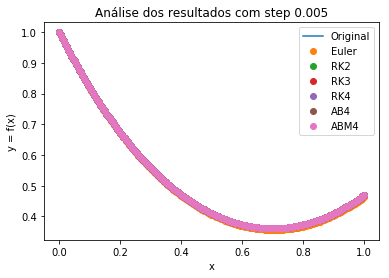

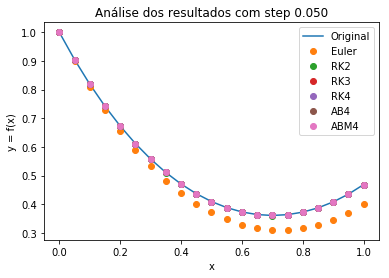

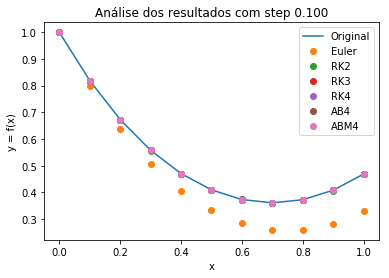

In [9]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt 
import numpy as np

x0 = 0
y0 = 1 
xf = 1.0
edo = edoC
splits = [0.005, 0.05, 0.1]

html = """"""

for h in splits:
    
    n = int(round(np.floor((xf - x0)/h)))+1

    # Solucao 'exata'
    exata = []
    for i in range(n): 
        x = x0 + h*i
        y = equacaoC_exata(x)
        exata.append(y)

    # Utilizacao dos metodos de resolucao de edoh    
    t_euler, euler = calcular_por_euler(edo, x0, y0, h, n)
    t_rk2, rk2 = calcular_por_rk2(edo, x0, y0, h, n)
    t_rk3, rk3 = calcular_por_rk3(edo, x0, y0, h, n)
    t_rk4, rk4 = calcular_por_rk4(edo, x0, y0, h, n)
    t_ab4, ab4 = calcular_por_ab4(edo, x0, y0, h, n)
    t_abm4, abm4 = calcular_por_abm4(edo, x0, y0, h, n)

    # Plotagem dos resultados
    plt.title('Análise dos resultados com step %.3f' %(h))
    plt.xlabel("x")
    plt.ylabel("y = f(x)")

    legenda_exata, = plt.plot(t_euler, exata, label="Original")
    legenda_euler, = plt.plot(t_euler, euler, 'o', label="Euler")
    legenda_euler_melhorado, = plt.plot(t_rk2, rk2, 'o', label="RK2")
    legenda_rk3, = plt.plot(t_rk3, rk3, 'o', label="RK3")
    legenda_rk4, = plt.plot(t_rk4, rk4, 'o', label="RK4")
    legenda_ab4, = plt.plot(t_ab4, ab4, 'o', label="AB4")
    legenda_abm4, = plt.plot(t_abm4, abm4, 'o', label="ABM4")

    plt.legend(handles=[legenda_exata, legenda_euler, legenda_euler_melhorado, 
                        legenda_rk3, legenda_rk4, legenda_ab4, legenda_abm4])
    plt.show()

    html = html + """
         <table style="border:none">
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="3">
                 <center> h = %.3f </center> """ %h + """
                 </th>
             </tr>
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Método</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Precisão (porcentagem)</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;"> Erro absoluto </th>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Euler</td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calcular_precisao(exata, euler) + """ </td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calcular_erro_absoluto(exata, euler) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 2</td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_precisao(exata, rk2) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_erro_absoluto(exata, rk2) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 3</td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calcular_precisao(exata, rk3) + """ </td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calcular_erro_absoluto(exata, rk3) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Runge-Kutta 4</td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calcular_precisao(exata, rk4) + """ </td>
                 <td style="padding:20px; border:none; color:green;"> %f """ %calcular_erro_absoluto(exata, rk4) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Adams-Bashforth 4</td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_precisao(exata, ab4) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_erro_absoluto(exata, ab4) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none; color:blue;"><strong>Adams-Bashforth-Moulton 4</strong></td>
                 <td style="padding:20px; border:none; color:blue;"> 
                     <strong> %f """ %calcular_precisao(exata, abm4) + """</strong>
                 </td>
                 <td style="padding:20px; border:none; color:blue;"> 
                     <strong> %f """ %calcular_erro_absoluto(exata, abm4) + """</strong>
                 </td>
             </tr>
            """ 

HTML(html)


<h3>Comparativo com a função ODE do Scipy</h3>

<p style="text-align: justify; text-indent:4em">Para mensurar os resultados obtidos através da implementação dos métodos propostos, pode-se comparar os resultados do método de Runge-Kutta 4, que obteve os melhores resultados para a ODE analisada nesse trabalho, com a função ODE do Scipy.</p>

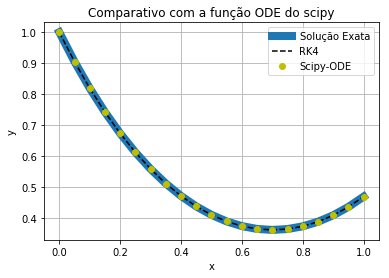

In [15]:
import time
import numpy as np
from scipy import integrate
from matplotlib.pylab import *
from IPython.core.display import HTML

x0 = 0
y0 = 1 
xf = 1.0
h = 0.05
edo = edoC
n = int(round(np.floor((xf - x0)/h)))+1

# Solucao 'exata'
exata = []
for i in range(n): 
    x = x0 + h*i
    y = equacaoC_exata(x)
    exata.append(y)

tempo_scipy = time.time()
# Solucao Scipy 
r = integrate.ode(edoC).set_integrator('vode', method='bdf')
r.set_initial_value([y0], x0)
dominio_scipy = np.zeros((n, 1))
sol_scipy = np.zeros((n, 1))
dominio_scipy[0] = x0
sol_scipy[0] = y0
k = 1
while r.successful() and k < n:
    r.integrate(r.t + h)
    dominio_scipy[k] = r.t
    sol_scipy[k] = r.y[0]
    k += 1
tempo_scipy = time.time() - tempo_scipy

tempo_rk4_implementado = time.time()
t, rk4 = calcular_por_rk4(edo, x0, y0, h, n)
tempo_rk4_implementado = time.time() - tempo_rk4_implementado

legenda_exata, = plt.plot(t, exata, label="Solução Exata", linewidth=8.0)
legenda_rk4, = plt.plot(t, rk4, '--', label="RK4", color='black')
legenda_sol_scipy, = plt.plot(t, sol_scipy, 'o', color="y", label="Scipy-ODE")

plt.title("Comparativo com a função ODE do scipy")
plt.legend(handles=[legenda_exata, legenda_rk4, legenda_sol_scipy])
grid('on')
xlabel('x')
ylabel('y')
plt.show()
html = """
     <table style="border:none">
         <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="4">
             <center> h = %.3f </center> """ %h + """
             </th>
         </tr>
         <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Método</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Precisão (porcentagem)</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Erro absoluto</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Tempo Gasto (segundos)</th>
         </tr>
         <tr style="border:none;">
             <td style="padding:20px; border:none;">Scipy-ODE</td>
             <td style="padding:20px; border:none;">%s</td>
             """ %str(calcular_precisao(exata, sol_scipy)[0]) + """
             <td style="padding:20px; border:none;">%s</td>
             """ %str(calcular_erro_absoluto(exata, sol_scipy)[0]) + """
             <td style="padding:20px; border:none"> %f </td>""" %tempo_scipy + """
        <\tr>
        <tr style="border:none;">
             <td style="padding:20px; border:none;">RK4 Implementado</td>
             <td style="padding:20px; border:none;">%s</td> """ %str(calcular_precisao(exata, rk4)) + """
             <td style="padding:20px; border:none;">%s</td> """ %str(calcular_erro_absoluto(exata, rk4)) + """
             <td style="padding:20px; border:none;"> %f </td>""" %tempo_rk4_implementado + """
        </tr>
        <tr style="border:none">
             <th style="padding:20px; border:none; background-color:#f7f7f7;">Resultados</th>
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(calcular_precisao(exata, rk4)-calcular_precisao(exata, sol_scipy)[0])  + """ mais eficiente
             </th>
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(calcular_erro_absoluto(exata, sol_scipy)[0]-calcular_erro_absoluto(exata, rk4))  + """ menor             </th>
             
             <th style="padding:20px; border:none; background-color:#f7f7f7; color:green;">
                 %f """ %(tempo_scipy-tempo_rk4_implementado) + """ mais rápido
             </th>
         </tr>
     </table>"""
HTML(html)

<p style="text-align: justify; text-indent:4em">Assim, constatou-se que para a ODE analisada nesse trabalho, o método de Runge-Kutta 4 implementado obteve um desempenho melhor do que a da função ODE do Scipy (com os parâmetros defaults) para o step 0.5 no intervalo 0-3. Alcançando uma maior precisão, com um menor erro absoluto, também sendo mais eficiente em relação ao tempo.</p>

<h2>Equações Diferenciais Ordinárias de Ordem N</h2>

<p style="text-align: justify; text-indent:4em">Para a resolução de equações diferenciais ordinárias de ordem maior do que 1, pode-se transformar essa EDO em um sistema de equações diferenciais de ordem 1. Nessa seção, utilizou-se a EDO abaixo. </p>

\begin{align*} 
\left(
\begin{array}{c}
y^{''} = y + e^{x}\\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: center"> <strong>EDO de ordem 2 - EDO2 A</strong> </p>

<p style="text-align: justify; text-indent:4em"> Pode-se utilizar variáveis auxiliares que representem as derivadas, da seguinte maneira: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}\\
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> Assim, a EDO de ordem 2 pode ser escrita através do seguinte sistema de EDO's de ordem 1:  </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 = f1 \\
y_2{'} = y_1 + e^{x} = f2\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> Analogamente, pode-se fazer o mesmo processo para uma outra EDO de ordem 2, como a mostrada abaixo: </p>

\begin{align*} 
\left(
\begin{array}{c}
y^{''} = x + 1 \\
y(0) = 1 \\
y^{'}(0) = 0 
\end{array}
\right)
\end{align*}
<p style="text-align: center"> <strong>EDO de ordem 2 - EDO2 B</strong> </p>

<p style="text-align: justify; text-indent:4em"> De tal maneira que tem-se: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1 = y \\
y_2 = y^{'}
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em"> E, finalmente: </p>

\begin{align*} 
\left(
\begin{array}{c}
y_1^{'} = y_2 = f1\\
y_2{'} = x + y_1 =f2\\
y_1(0) = 1 \\
y_2(0) = 0 
\end{array}
\right)
\end{align*}

<p style="text-align: justify; text-indent:4em">A eficácia da resolução desse método numérico pode ser comparado com a solução analítica a seguir: </p>


\begin{align*} 
    y(x) = x^2 + 3x - 3
\end{align*}


<p style="text-align: justify; text-indent:4em">Assim, essas duas equações ordinárias de ordem 2, foram expressas em sistemas de EDO's de ordem 1. As duas esquações que compõem cada sistema estão representadas na célula abaixo, bem como as soluções exatas utilizadas para a verificação dos métodos de predição.</p>

In [11]:
import numpy as np

#  edo2_f1 f1 do sistem de equacaoes diferenciais A: y = y_2
def edo2A_f1(x, ydot):
    return ydot

#  f2 do sistem de equacaoes diferenciais A: y'_2 = y + e**x
def edo2A_f2(x, y):
    return y + np.exp(x)

# Solucao exata da EDO A obtida analiticamente
def edo2A_exata(x):
    return (0.25*np.exp(x)) + (0.75 * np.exp(-x)) + (0.5*x*np.exp(x))


#  f2 f1 do sistem de equacaoes diferenciais A: y = y_2
def edo2B_f1(x, ydot):
    return ydot

#  f2 do sistem de equacaoes diferenciais A: y'_2 = x +y
def edo2B_f2(x, y):
    return x + y

# Solucao exata da EDO B obtida analiticamente
def edo2B_exata(x):
    return np.exp(x) - x






<p style="text-align: justify; text-indent:4em">Para a resolução desses sistemas de equações diferenciais de ordem 1 que descrevem EDO's de ordem 2, desenvolveu-se uma função que recebe como parâmetro o sistema (as duas equações), bem como o tipo da aproximação (Euler, RK2, Rk3, RK4) e assim reaproveitou-se as aproximações já desenvolvidas na seção anterior.</p>

In [12]:
def aproximacao_edo2(tipo: str, f: list, x_0: float, y_0: float, ydot_0: float, h: float, n: int):
    imagem = [0]*n
    dominio = [0]*n
    ydot = [0]*n
    
    dominio[0] = x_0
    imagem[0] = y_0
    ydot[0] = ydot_0
    
    if tipo == "euler":
        predicao = predicao_euler
    elif tipo == "rk2":
        predicao = predicao_rk2
    elif tipo == "rk3":
        predicao = predicao_rk3
    elif tipo == "rk4":
        predicao = predicao_rk4
    
    aux = dominio[0]
    for i in range(n-1):
        aux += h
        dominio[i+1] = aux 
        imagem[i+1] = imagem[i] + predicao(f[0], dominio[i], ydot[i], h)
        ydot[i+1] = ydot[i] + predicao(f[1], dominio[i], imagem[i], h)

    return dominio, imagem, ydot

# teste
sistema = [edo2A_f1, edo2A_f2]
aproximacao_edo2(tipo="rk4", f=sistema, x_0=0, y_0=1, ydot_0=0, h=0.1, n=4)


([0, 0.1, 0.2, 0.30000000000000004],
 [1, 1.0, 1.022684061946882, 1.0692746040135033],
 [0, 0.21568776463894715, 0.44299869640620898, 0.68554091615795554])

<h2>Resultados</h2>

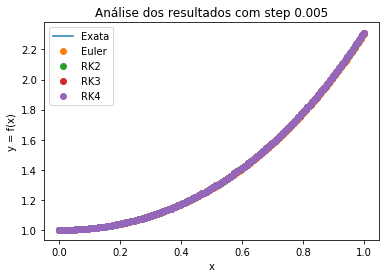

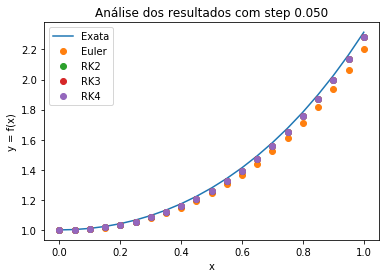

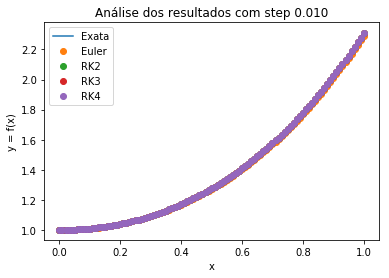

In [13]:
import matplotlib.pyplot as plt 

sistema = [edo2A_f1, edo2A_f2]

x0 = 0
y0 = 1
xf = 1
ydot0 = 0
splits = [0.005, 0.05, 0.01]

html = """"""
for split in splits:
    n = int(round(np.floor((xf - x0)/split)))+1

    x_euler, y_euler, ydot_euler = aproximacao_edo2(tipo="euler", f=sistema, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)

    x_rk2, y_rk2, ydot_rk2 = aproximacao_edo2(tipo="rk2", f=sistema, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)

    x_rk3, y_rk3, ydot_rk3 = aproximacao_edo2(tipo="rk2", f=sistema, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)
    x_rk4, y_rk4, ydot_rk4 = aproximacao_edo2(tipo="rk4", f=sistema, 
                                                         x_0=x0, y_0=y0, ydot_0=ydot0, h=split, n=n)


    # Solucao 'exata'
    t = []
    exata_2ordem = []
    for i in range(n): 
        x = x0 + split*i
        y = edo2A_exata(x)
        exata_2ordem.append(y)
        t.append(x)


    # Plotagem dos resultados
    plt.title('Análise dos resultados com step %.3f' %(split))
    plt.xlabel("x")
    plt.ylabel("y = f(x)")

    legenda_exata02, = plt.plot(t, exata_2ordem, label="Exata")
    legenda_euler, = plt.plot(x_euler, y_euler, 'o', label="Euler")
    legenda_rk2, = plt.plot(x_rk2, y_rk2, 'o', label="RK2")
    legenda_rk3, = plt.plot(x_rk2, y_rk3, 'o', label="RK3")
    legenda_rk4, = plt.plot(x_rk2, y_rk4, 'o', label="RK4")
    #

    plt.legend(handles=[legenda_exata02, legenda_euler, legenda_rk2, legenda_rk3, legenda_rk4])
    plt.show()

    html += """
         <table style="border:none">
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;" colspan="3">
                 <center> split = %.3f </center> """ %h + """
                 </th>
             </tr>
             <tr style="border:none">
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Método</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Precisão (porcentagem)</th>
                 <th style="padding:20px; border:none; background-color:#f7f7f7;">Erro absoluto</th>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">Euler</td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calcular_precisao(exata_2ordem, y_euler) + """ </td>
                 <td style="padding:20px; border:none; color:red;"> %f """ %calcular_erro_absoluto(exata_2ordem, y_euler) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">RK2</td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_precisao(exata_2ordem, y_rk2) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_erro_absoluto(exata_2ordem, y_rk2) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none;">RK3</td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_precisao(exata_2ordem, y_rk3) + """ </td>
                 <td style="padding:20px; border:none;"> %f """ %calcular_erro_absoluto(exata_2ordem, y_rk3) + """ </td>
             </tr>
             <tr style="border:none;">
                 <td style="padding:20px; border:none; color:green; font-weight:bold;">RK4</td>
                 <td style="padding:20px; border:none; color:green; font-weight:bold"> %f 
                 """ %calcular_precisao(exata_2ordem, y_rk4) + """ </td>
                 <td style="padding:20px; border:none; color:green; font-weight:bold"> %f 
                 """ %calcular_erro_absoluto(exata_2ordem, y_rk4) + """ </td>
             </tr>
            """ 

HTML(html)



<h2>Conclusão</h2>

<p style="text-align: justify; text-indent:4em">Através do presente trabalho, concluiu-se que os métodos numéricos podem fornecer aproximações significativamente próximas das funções incógnitas de Equações Diferenciais. A eficiência e eficácia dessas aproximações estão instrinsecamente relacionadas com o "step" entre os valores do domínio. Além disso, comparou-se os resultados obtidos com o método de Runge-Kutta 4 no intervalo [0,1] com o step 0.5 na EDO 1 com os resultados oriundos da função ODE da biblioteca scipy - com parâmetros defaults(método de Adams). Nessa comparação, o método implementado foi mais eficiente (aproximação com menor tempo gasto), obteve uma maior precisão e um menor erro absoluto.</p>

<h2>Referências</h2>

<p>[1] https://www.ppgia.pucpr.br/~jamhour/Download/pub/MatComp/7.%20EquacoesDiferencaisOrdinarias.pdf </p>
<p>[2] http://www.mat.ufmg.br/~espec/Monografias_Noturna/Monografia_KarineNayara.pdf</p>
<p>[3] https://pt.wikipedia.org/wiki/M%C3%A9todo_de_passo_m%C3%BAltiplo</p>
<p>[4] http://members.tripod.com/tiago_pinho/trabalho2/metodos.pdf</p>


